In [155]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.cross_validation import train_test_split

C:\Users\johng\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
elite_reviews = pd.read_csv('elite_reviews_scores.csv')

In [4]:
row_reviews = pd.read_csv('row_reviews_scores.csv')

C:\Users\johng\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
total_reviews = pd.concat([elite_reviews, row_reviews])

C:\Users\johng\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [63]:
total_reviews.head()

,# elite years,Compound,Negative,Neutral,Positive,Unnamed: 0,business_id,cool,date,friends,funny,review_id,stars,text,useful,user_id
0,6.0,0.9400,0.041,0.671,0.289,0,5r6-G9C4YLbC7Ziz57l3rQ,0.0,2013-02-09,NaN,0.0,w41ZS9shepfO3uEyhXEWuQ,3,"Not bad!! Love that there is a gluten-free, ve...",1.0,u0LXt3Uea_GidxRW1xcsfg
1,6.0,0.8639,0.045,0.817,0.139,1,RtUvSWO_UZ8V3Wpj0n077w,1.0,2012-12-03,NaN,1.0,lsoSqIrrDbQvWpMvsSj2xw,3,Wanted to check out this place due to all the ...,2.0,u0LXt3Uea_GidxRW1xcsfg
2,6.0,0.9551,0.032,0.778,0.190,2,0W4lkclzZThpx3V65bVgig,0.0,2011-09-28,NaN,0.0,FunI9om-aK5oMIIJmhMlZA,4,a must stop when you are in montreal!\r\n\r\nI...,0.0,u0LXt3Uea_GidxRW1xcsfg
3,6.0,0.8529,0.048,0.745,0.208,3,oWTn2IzrprsRkPfULtjZtQ,0.0,2012-09-23,NaN,0.0,K7o5jDInfmX3cY5oH6ATNw,3,Came here for a burger as one of my friends sa...,4.0,u0LXt3Uea_GidxRW1xcsfg
4,6.0,0.4985,0.096,0.793,0.111,4,zgQHtqX0gqMw1nlBZl2VnQ,1.0,2012-10-30,NaN,2.0,WYDFJOBOl7cycd7gN-c_xA,1,really excited to hear of this restaurant comi...,9.0,u0LXt3Uea_GidxRW1xcsfg


In [64]:
total_reviews['review_length'] = total_reviews['text'].apply(lambda x: len(x))

In [65]:
total_reviews['review_length'].describe()

count    1.743203e+06
mean     6.564756e+02
std      6.080754e+02
min      1.000000e+00
25%      2.530000e+02
50%      4.670000e+02
75%      8.490000e+02
max      5.228000e+03
Name: review_length, dtype: float64

In [8]:
total_reviews['Total Votes'] = total_reviews['useful'] + total_reviews['funny'] + total_reviews['cool']

In [9]:
total_reviews['Total Votes'].describe()

count    1.743201e+06
mean     2.603064e+00
std      1.146611e+01
min     -2.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      5.950000e+03
Name: Total Votes, dtype: float64

elite_reviews = elite_reviews[elite_reviews['Total Votes'] > 50]

400 characters was chosen as an arbitrarily large enough review length for a meaningful sentiment analysis.

In [66]:
total_reviews = total_reviews[total_reviews['review_length'] >= 400]

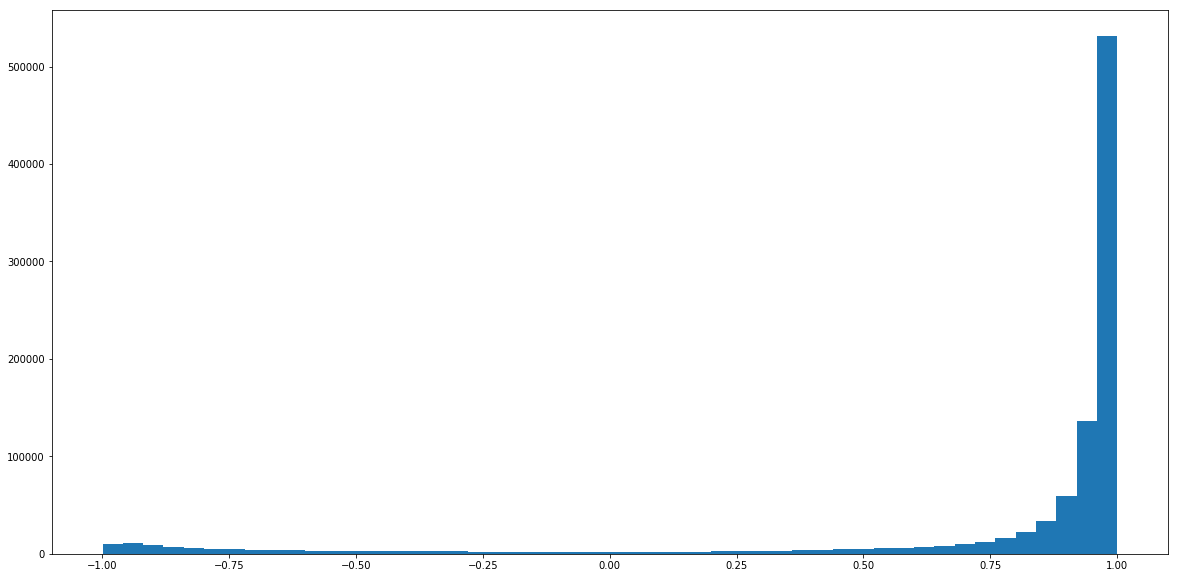

In [67]:
plt.figure(figsize=(20,10))
plt.hist(total_reviews['Compound'], bins = 50)
plt.show()

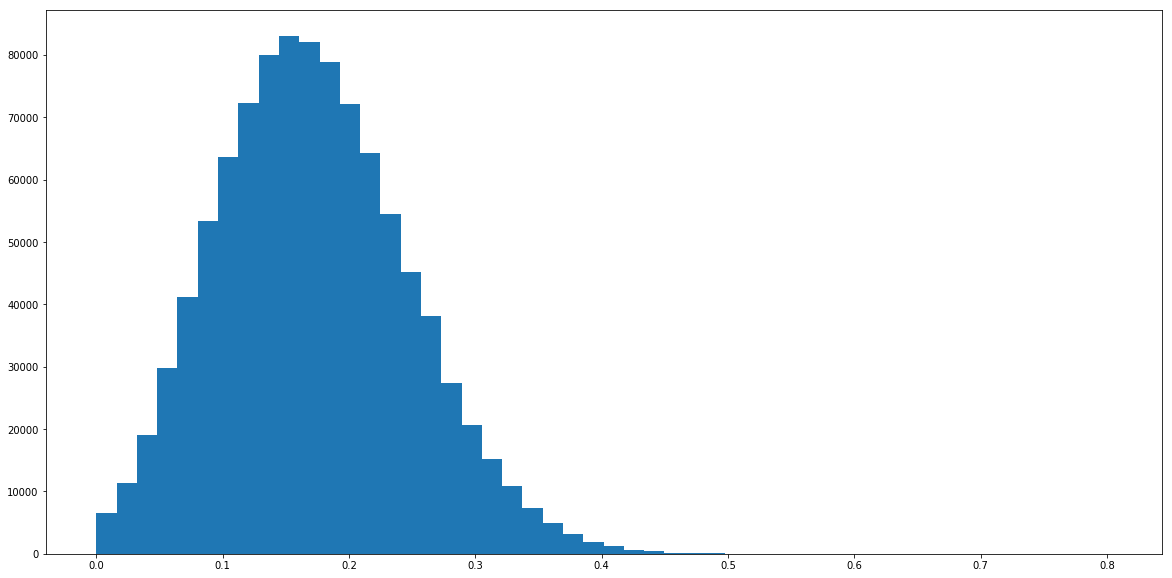

In [68]:
plt.figure(figsize=(20,10))
plt.hist(total_reviews['Positive'], bins = 50)
plt.show()

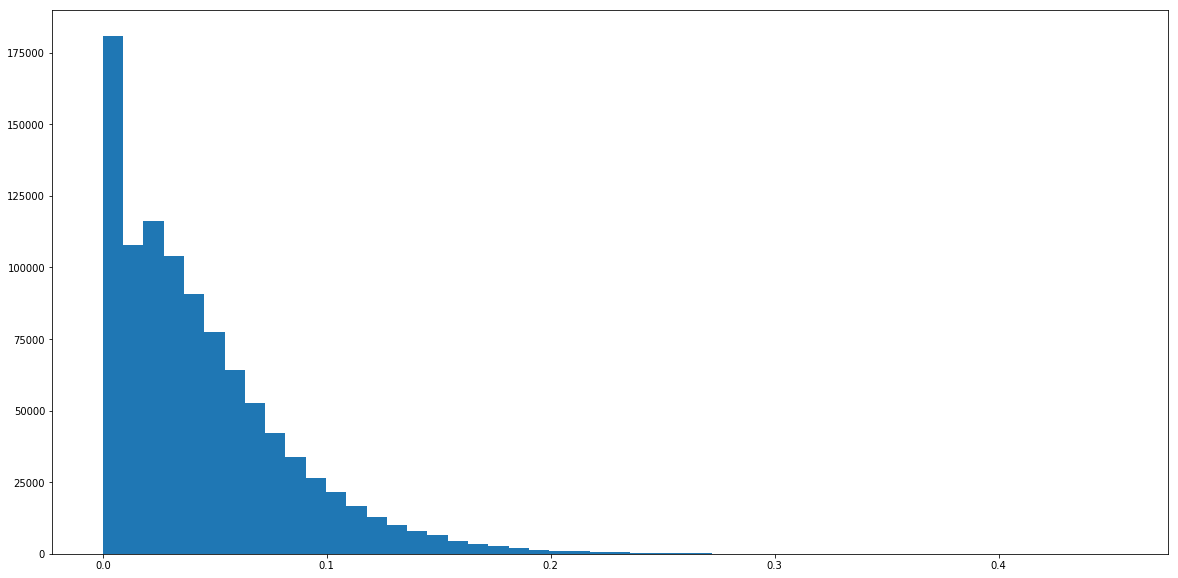

In [69]:
plt.figure(figsize=(20,10))
plt.hist(total_reviews['Negative'], bins = 50)
plt.show()

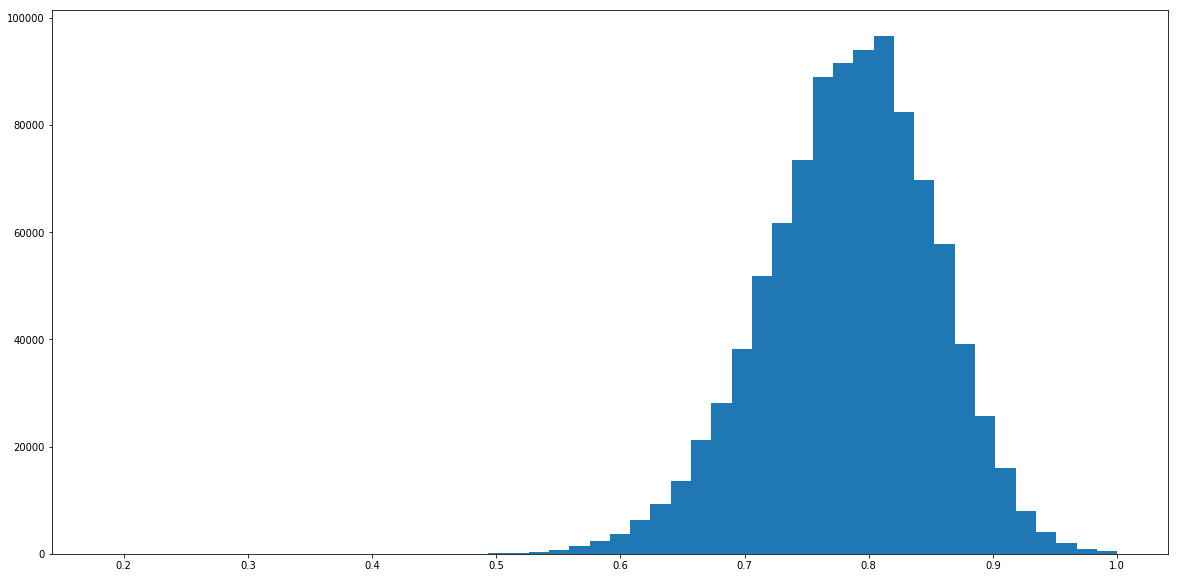

In [70]:
plt.figure(figsize=(20,10))
plt.hist(total_reviews['Neutral'], bins = 50)
plt.show()

In [97]:
stars1 = total_reviews[total_reviews['stars'] == 1]['Positive']
stars2 = total_reviews[total_reviews['stars'] == 2]['Positive']
stars3 = total_reviews[total_reviews['stars'] == 3]['Positive']
stars4 = total_reviews[total_reviews['stars'] == 4]['Positive']
stars5 = total_reviews[total_reviews['stars'] == 5]['Positive']
data_by_star = [stars1,stars2,stars3,stars4,stars5]

In [100]:
print(f'{len(stars1)} 1-star reviews, {len(stars2)} 2-star reviews, {len(stars3)} 3-star reviews, {len(stars4)} 4-star reviews, {len(stars5)} 5-star reviews')

95286 1-star reviews, 100673 2-star reviews, 159025 3-star reviews, 295404 4-star reviews, 307680 5-star reviews


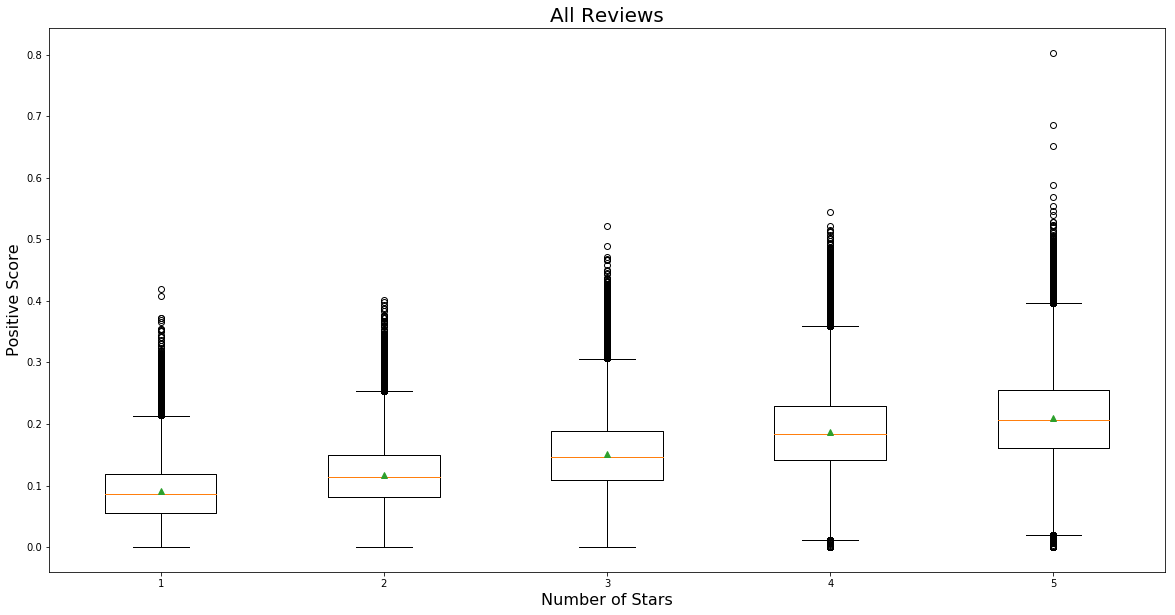

In [98]:
plt.figure(figsize=(20,10))
plt.boxplot(data_by_star, showmeans=True)
plt.title('All Reviews', fontsize = 20)
plt.xlabel('Number of Stars', fontsize = 16)
plt.ylabel('Positive Score', fontsize = 16)
plt.savefig('positiveboxplot.png')
plt.show()

In [88]:
stars1 = total_reviews[total_reviews['stars'] == 1]['Negative']
stars2 = total_reviews[total_reviews['stars'] == 2]['Negative']
stars3 = total_reviews[total_reviews['stars'] == 3]['Negative']
stars4 = total_reviews[total_reviews['stars'] == 4]['Negative']
stars5 = total_reviews[total_reviews['stars'] == 5]['Negative']
data_by_star = [stars1,stars2,stars3,stars4,stars5]

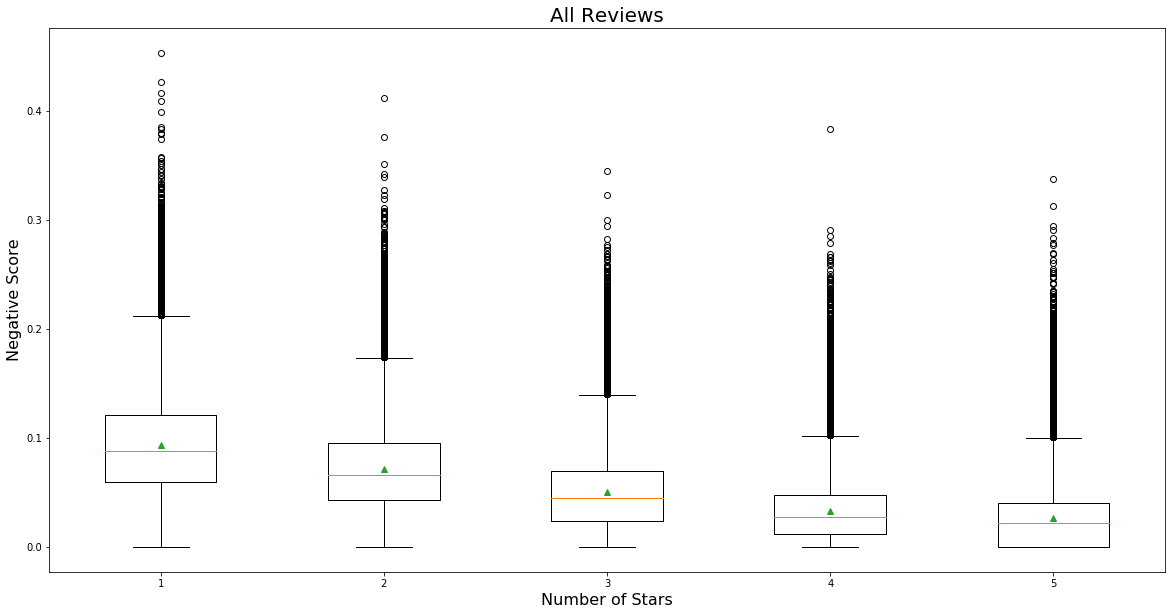

In [90]:
plt.figure(figsize=(20,10))
plt.boxplot(data_by_star, showmeans=True)
plt.title('All Reviews', fontsize = 20)
plt.xlabel('Number of Stars', fontsize = 16)
plt.ylabel('Negative Score', fontsize = 16)
plt.savefig('negativeboxplot.png')
plt.show()

In [93]:
stars1 = total_reviews[total_reviews['stars'] == 1]['Neutral']
stars2 = total_reviews[total_reviews['stars'] == 2]['Neutral']
stars3 = total_reviews[total_reviews['stars'] == 3]['Neutral']
stars4 = total_reviews[total_reviews['stars'] == 4]['Neutral']
stars5 = total_reviews[total_reviews['stars'] == 5]['Neutral']
data_by_star = [stars1,stars2,stars3,stars4,stars5]

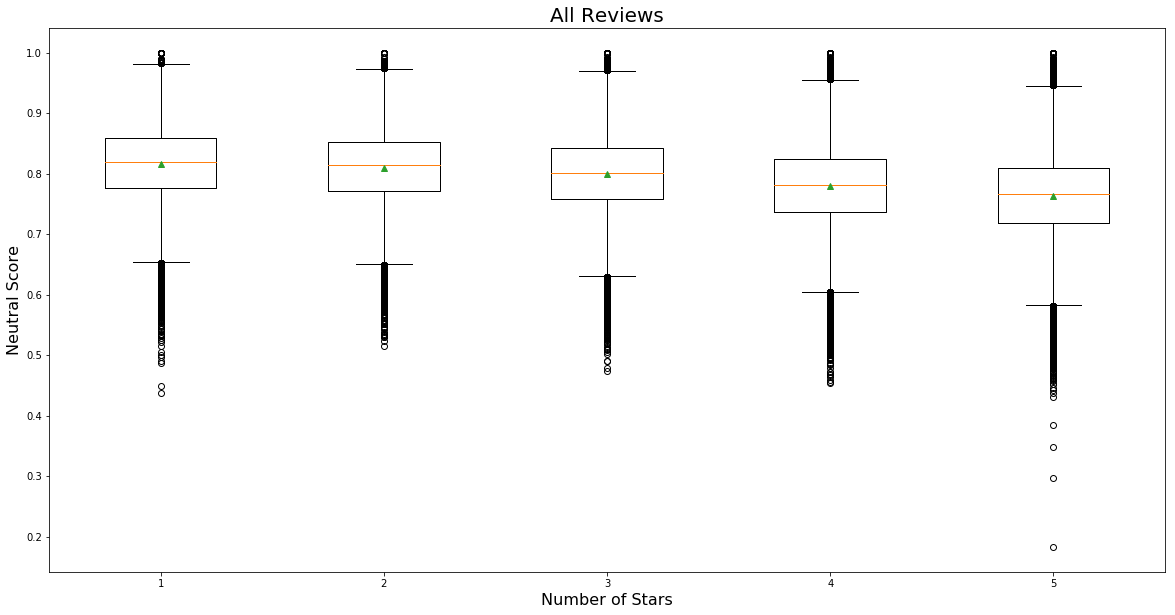

In [94]:
plt.figure(figsize=(20,10))
plt.boxplot(data_by_star, showmeans=True)
plt.title('All Reviews', fontsize = 20)
plt.xlabel('Number of Stars', fontsize = 16)
plt.ylabel('Neutral Score', fontsize = 16)
plt.savefig('neutralboxplot.png')
plt.show()

In [101]:
stars1 = total_reviews[total_reviews['stars'] == 1]['Compound']
stars2 = total_reviews[total_reviews['stars'] == 2]['Compound']
stars3 = total_reviews[total_reviews['stars'] == 3]['Compound']
stars4 = total_reviews[total_reviews['stars'] == 4]['Compound']
stars5 = total_reviews[total_reviews['stars'] == 5]['Compound']
data_by_star = [stars1,stars2,stars3,stars4,stars5]

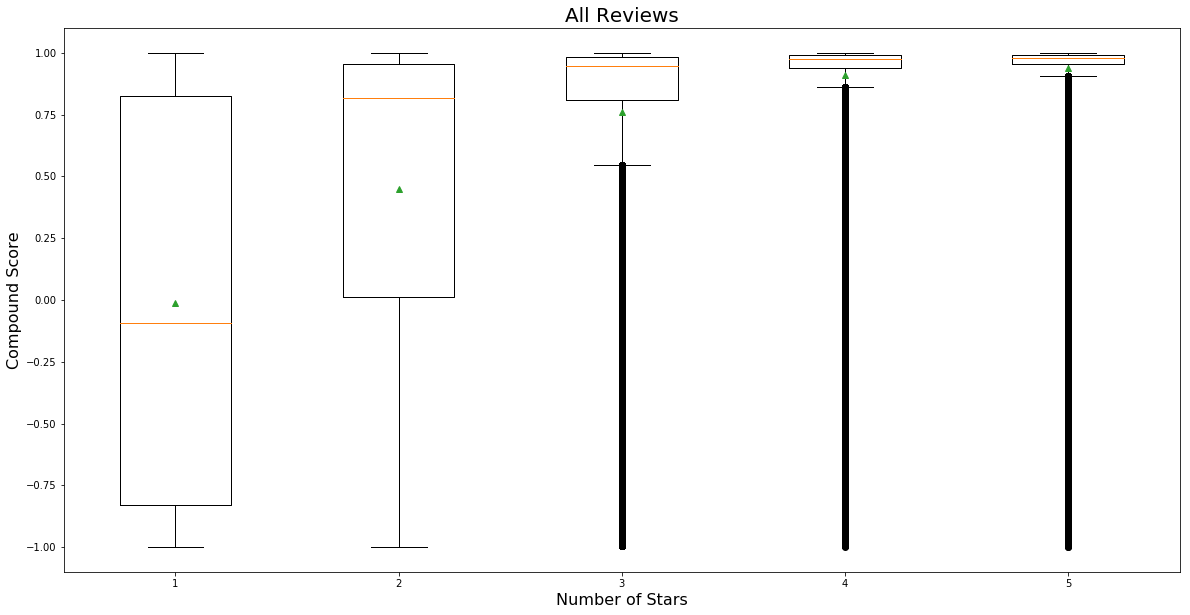

In [96]:
plt.figure(figsize=(20,10))
plt.boxplot(data_by_star, showmeans=True)
plt.title('All Reviews', fontsize = 20)
plt.xlabel('Number of Stars', fontsize = 16)
plt.ylabel('Compound Score', fontsize = 16)
plt.savefig('compoundboxplot.png')
plt.show()

In [110]:
print(stars3.describe(),stars4.describe())

count    159025.000000
mean          0.759860
std           0.443397
min          -0.997100
25%           0.807800
50%           0.946400
75%           0.981600
max           0.999800
Name: Compound, dtype: float64 count    295404.000000
mean          0.908891
std           0.237962
min          -0.998500
25%           0.938200
50%           0.975600
75%           0.989700
max           0.999900
Name: Compound, dtype: float64


In [22]:
total_reviews.head()

,# elite years,Compound,Negative,Neutral,Positive,Unnamed: 0,business_id,cool,date,friends,funny,review_id,stars,text,useful,user_id,review_length,Total Votes
4,6.0,0.4985,0.096,0.793,0.111,4,zgQHtqX0gqMw1nlBZl2VnQ,1.0,2012-10-30,NaN,2.0,WYDFJOBOl7cycd7gN-c_xA,1,really excited to hear of this restaurant comi...,9.0,u0LXt3Uea_GidxRW1xcsfg,1050,12.0
5,6.0,0.9706,0.033,0.843,0.124,5,28adZ4lsuUeVB2aWzohK9g,0.0,2012-10-19,NaN,0.0,HSR2RLOifd0cvSNVqGXkMQ,3,was always intrigued of this place when I pass...,1.0,u0LXt3Uea_GidxRW1xcsfg,1347,1.0
11,6.0,0.9973,0.014,0.736,0.249,11,pZ1quwXnYozLIZIVABojhw,0.0,2012-09-23,NaN,0.0,EKAN4jw3LsE3631feSaA_g,4,My boyfriend took me here for my birthday. At ...,0.0,u0LXt3Uea_GidxRW1xcsfg,1433,0.0
12,6.0,0.9233,0.014,0.889,0.097,12,Uq-GOs9_IqweUsB5MdII9w,0.0,2014-08-21,NaN,0.0,51TLGhFncBnppaBN5vHlcw,4,OMG - came here with some friends for Brunch a...,0.0,u0LXt3Uea_GidxRW1xcsfg,930,0.0
18,6.0,-0.3436,0.064,0.881,0.055,18,An-JJle53UMHokU4MwFktg,0.0,2017-01-26,NaN,0.0,8aIpsx2-l__KLKo7Ljs8pQ,3,my sister is a big fan of the noodles here as ...,0.0,u0LXt3Uea_GidxRW1xcsfg,795,0.0


In [117]:
elite_reviews.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'stars', 'date',
       'text', 'useful', 'funny', 'cool', '# elite years', 'Positive',
       'Negative', 'Neutral', 'Compound'],
      dtype='object')

In [119]:
total_reviews = total_reviews[elite_reviews.columns]

In [120]:
total_reviews.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool,# elite years,Positive,Negative,Neutral,Compound
1,1,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2.0,1.0,1.0,6.0,0.139,0.045,0.817,0.8639
2,2,FunI9om-aK5oMIIJmhMlZA,u0LXt3Uea_GidxRW1xcsfg,0W4lkclzZThpx3V65bVgig,4,2011-09-28,a must stop when you are in montreal!\r\n\r\nI...,0.0,0.0,0.0,6.0,0.190,0.032,0.778,0.9551
4,4,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9.0,2.0,1.0,6.0,0.111,0.096,0.793,0.4985
5,5,HSR2RLOifd0cvSNVqGXkMQ,u0LXt3Uea_GidxRW1xcsfg,28adZ4lsuUeVB2aWzohK9g,3,2012-10-19,was always intrigued of this place when I pass...,1.0,0.0,0.0,6.0,0.124,0.033,0.843,0.9706
8,8,Enuk_DJbK0JPmgbFU8ePKw,u0LXt3Uea_GidxRW1xcsfg,N93EYZy9R0sdlEvubu94ig,3,2012-09-23,"Not sure what the hype is, but decided to give...",0.0,0.0,0.0,6.0,0.138,0.044,0.817,0.7759


In [137]:
type(total_reviews['Neutral'][4])

numpy.float64

# Linear Regression on individual reviews





In [148]:
x_pos = total_reviews.iloc[:,11].values
x_neg = total_reviews.iloc[:,12].values
x_neu = total_reviews.iloc[:,13].values
x_comp = total_reviews.iloc[:,14].values
y = total_reviews.iloc[:,4].values.astype(float)

#### Test all 4 sentiment score components

In [149]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_neu.reshape(-1,1),x_comp.reshape(-1,1)), axis = 1)
X

array([[0.139 , 0.045 , 0.817 , 0.8639],
       [0.19  , 0.032 , 0.778 , 0.9551],
       [0.111 , 0.096 , 0.793 , 0.4985],
       ...,
       [0.266 , 0.022 , 0.712 , 0.9691],
       [0.154 , 0.024 , 0.821 , 0.9902],
       [0.106 , 0.032 , 0.862 , 0.9517]])

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [151]:
# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 2.408e+06
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:12:03   Log-Likelihood:            -9.8415e+05
No. Observations:              692763   AIC:                         1.968e+06
Df Residuals:                  692759   BIC:                         1.968e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             8.2559      0.018    458.788      0.0

In [162]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 1.005
Variance Score: 0.406


The coefficients in the above model have sufficiently low p-values to expect taht they are significant to the model. For the sake of exploration, we arbitrarily decided to create models with less x variables.

#### Remove compound from model

In [164]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_neu.reshape(-1,1)), axis = 1)
X

array([[0.139, 0.045, 0.817],
       [0.19 , 0.032, 0.778],
       [0.111, 0.096, 0.793],
       ...,
       [0.266, 0.022, 0.712],
       [0.154, 0.024, 0.821],
       [0.106, 0.032, 0.862]])

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [166]:
# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 3.145e+06
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:18:48   Log-Likelihood:            -9.9072e+05
No. Observations:              692763   AIC:                         1.981e+06
Df Residuals:                  692760   BIC:                         1.981e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.5254      0.014    663.611      0.0

In [167]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 1.024
Variance Score: 0.395


#### Model only pos and neu

In [168]:
X = np.concatenate((x_pos.reshape(-1,1),x_neu.reshape(-1,1)), axis = 1)
X

array([[0.139, 0.817],
       [0.19 , 0.778],
       [0.111, 0.793],
       ...,
       [0.266, 0.712],
       [0.154, 0.821],
       [0.106, 0.862]])

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [170]:
# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 4.168e+06
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:21:58   Log-Likelihood:            -1.0305e+06
No. Observations:              692763   AIC:                         2.061e+06
Df Residuals:                  692761   BIC:                         2.061e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.6146      0.015    723.283      0.0

In [171]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 1.151
Variance Score: 0.320


#### Model only compound

In [172]:
X = x_comp
X

array([0.8639, 0.9551, 0.4985, ..., 0.9691, 0.9902, 0.9517])

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [174]:
# X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 2.445e+06
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:22:15   Log-Likelihood:            -1.3967e+06
No. Observations:              692763   AIC:                         2.793e+06
Df Residuals:                  692762   BIC:                         2.793e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.7651      0.002   1563.528      0.0

In [175]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 3.313
Variance Score: -0.958


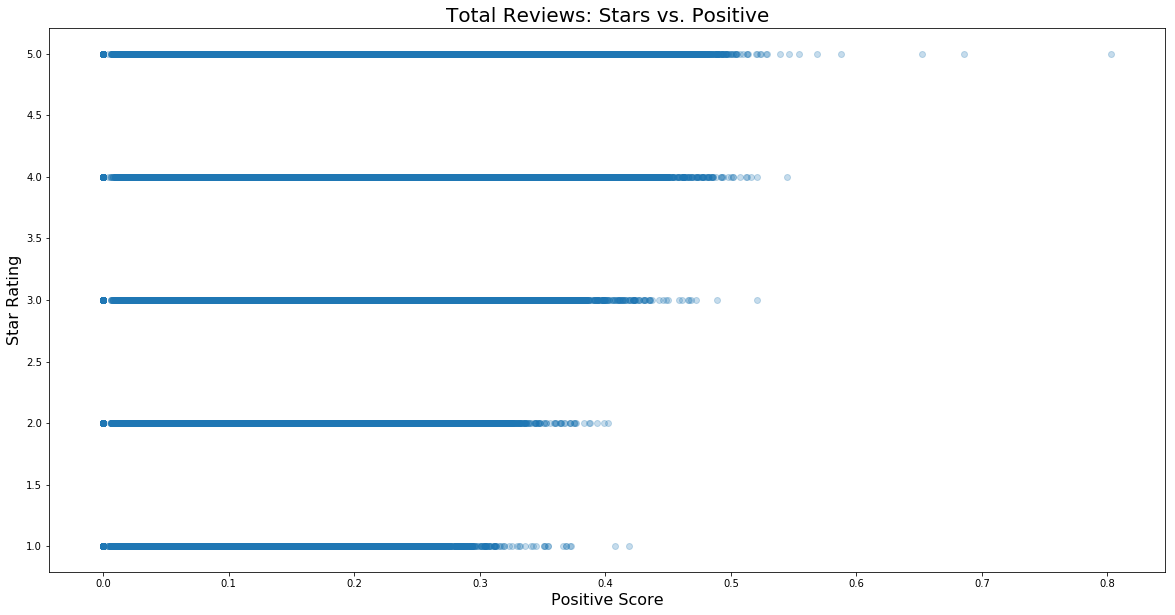

In [177]:
plt.figure(figsize=(20,10))
plt.title('Total Reviews: Stars vs. Positive', fontsize = 20)
plt.xlabel('Positive Score', fontsize = 16)
plt.ylabel('Star Rating', fontsize = 16)
plt.scatter(total_reviews['Positive'], total_reviews['stars'], alpha = 0.25)
plt.savefig('totstarspos.png')
plt.show()

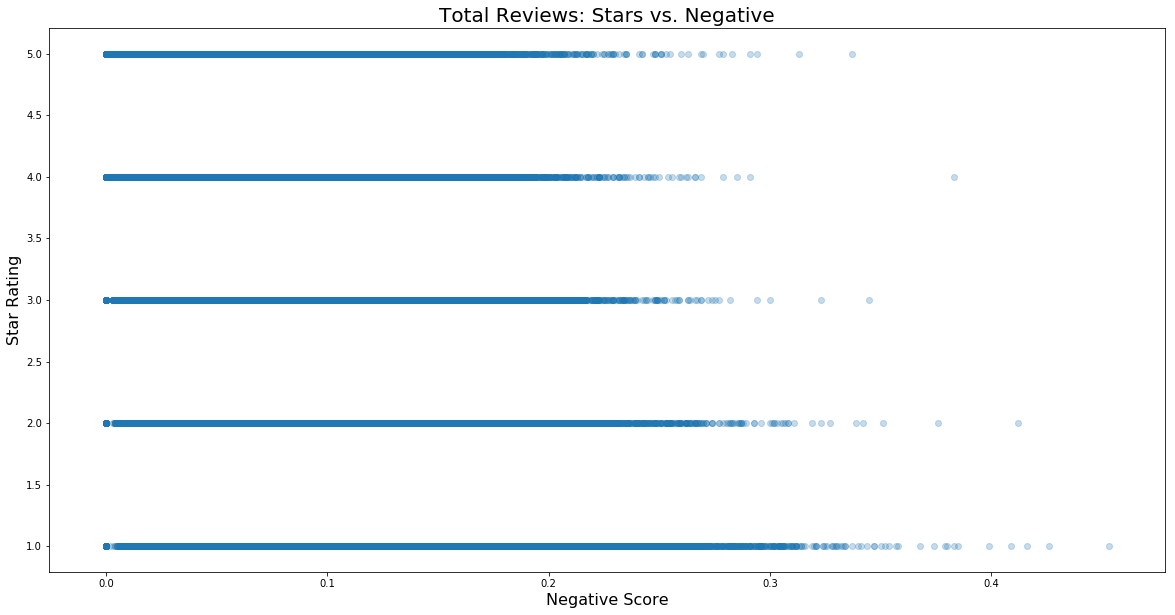

In [178]:
plt.figure(figsize=(20,10))
plt.title('Total Reviews: Stars vs. Negative', fontsize = 20)
plt.xlabel('Negative Score', fontsize = 16)
plt.ylabel('Star Rating', fontsize = 16)
plt.scatter(total_reviews['Negative'], total_reviews['stars'], alpha = 0.25)
plt.savefig('totstarsneg.png')
plt.show()

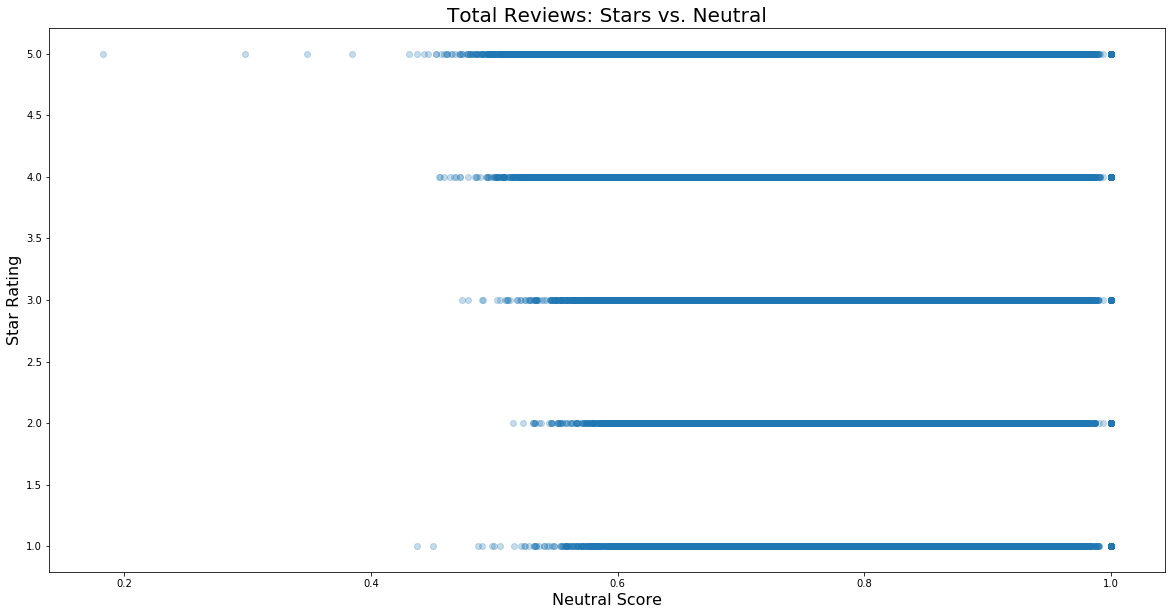

In [179]:
plt.figure(figsize=(20,10))
plt.title('Total Reviews: Stars vs. Neutral', fontsize = 20)
plt.xlabel('Neutral Score', fontsize = 16)
plt.ylabel('Star Rating', fontsize = 16)
plt.scatter(total_reviews['Neutral'], total_reviews['stars'], alpha = 0.25)
plt.savefig('totstarsneu.png')
plt.show()

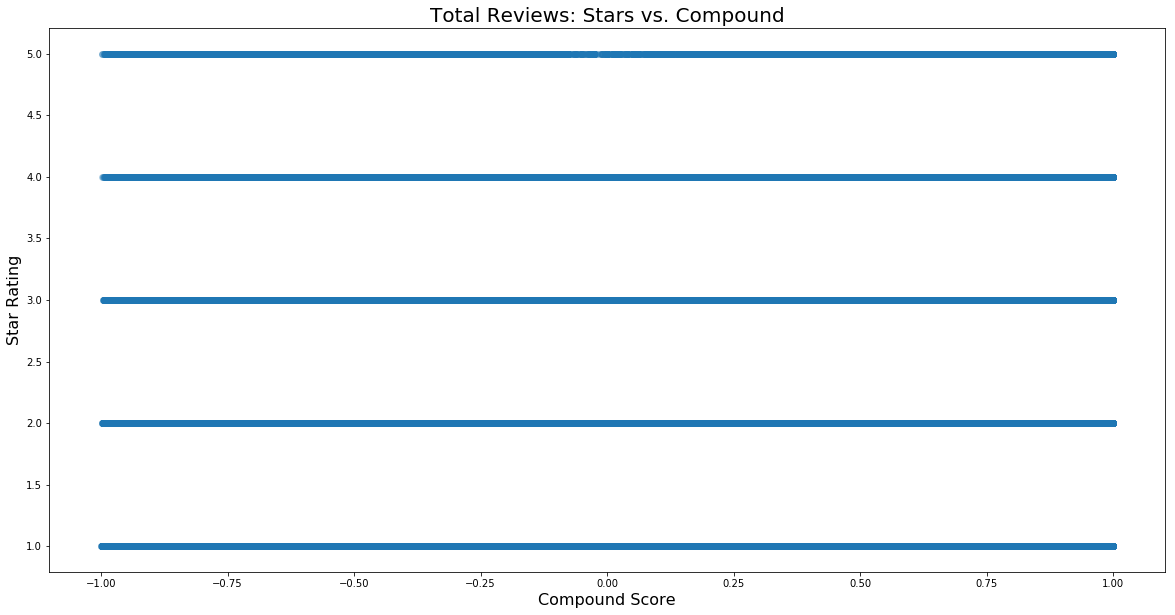

In [180]:
plt.figure(figsize=(20,10))
plt.title('Total Reviews: Stars vs. Compound', fontsize = 20)
plt.xlabel('Compound Score', fontsize = 16)
plt.ylabel('Star Rating', fontsize = 16)
plt.scatter(total_reviews['Compound'], total_reviews['stars'], alpha = 0.25)
plt.savefig('totstarscomp.png')
plt.show()

## Average scores for each business

The above models were trained on a dataset that contained individual reviews. This data set lacks granularity in the y-variable, as each y can only be an integer 1 - 5. To force the response variable to be "more continuous" the x and y variables will be grouped and averaged by business ID so that each data point will represent a business.

In [181]:
avg_total_reviews = pd.DataFrame(elite_reviews.groupby('business_id')[['stars','Positive','Negative','Neutral','Compound']].mean())
avg_total_reviews

,stars,Positive,Negative,Neutral,Compound
business_id,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.149770,0.207993,0.036795,0.755221,0.886341
--cZ6Hhc9F7VkKXxHMVZSQ,3.908257,0.196073,0.029642,0.774284,0.872770
-050d_XIor1NpCuWkbIVaQ,4.058824,0.181261,0.035580,0.783206,0.859480
-0qht1roIqleKiQkBLDkbw,3.403846,0.160981,0.043635,0.795327,0.813721
-1UMR00eXtwaeh59pEiDjA,3.694118,0.189047,0.045471,0.765459,0.758236
-1xuC540Nycht_iWFeJ-dw,4.234899,0.173376,0.037517,0.789114,0.760418
-2ToCaDFpTNmmg3QFzxcWg,2.214286,0.078214,0.078750,0.843071,0.089362
-3zffZUHoY8bQjGfPSoBKQ,4.103960,0.186332,0.030495,0.783183,0.872177
-4TMQnQJW1yd6NqGRDvAeA,4.241935,0.223468,0.029161,0.747435,0.939687


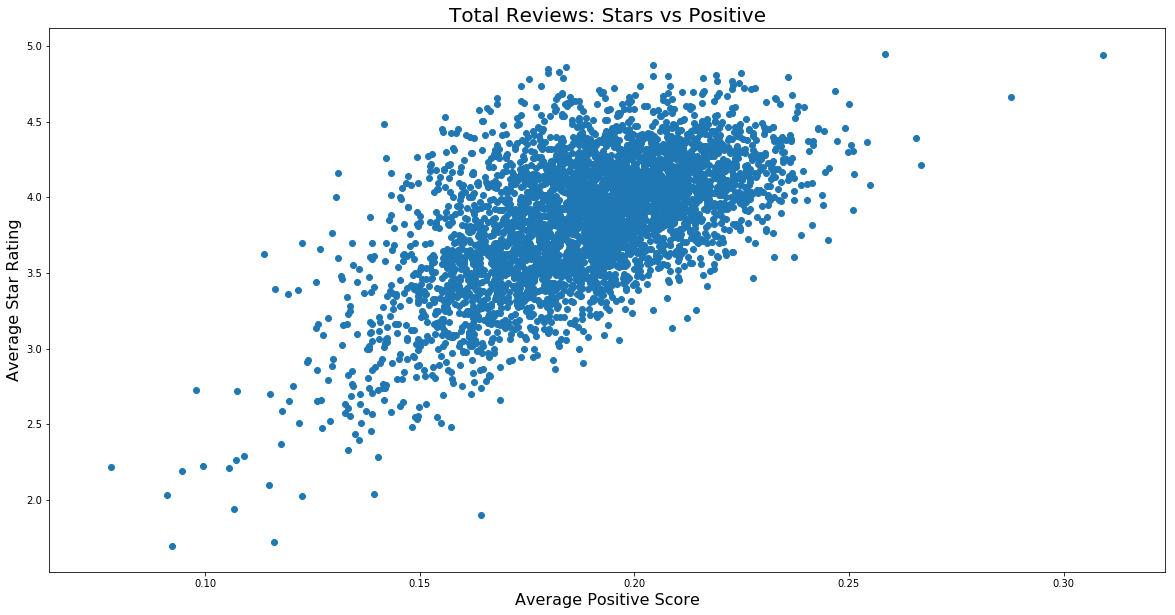

In [182]:
plt.figure(figsize=(20,10))
plt.scatter(avg_total_reviews['Positive'], avg_total_reviews['stars'])
plt.title('Total Reviews: Stars vs Positive', fontsize = 20)
plt.xlabel('Average Positive Score', fontsize = 16)
plt.ylabel('Average Star Rating', fontsize = 16)
plt.savefig('avgtotalpos.png')
plt.show()

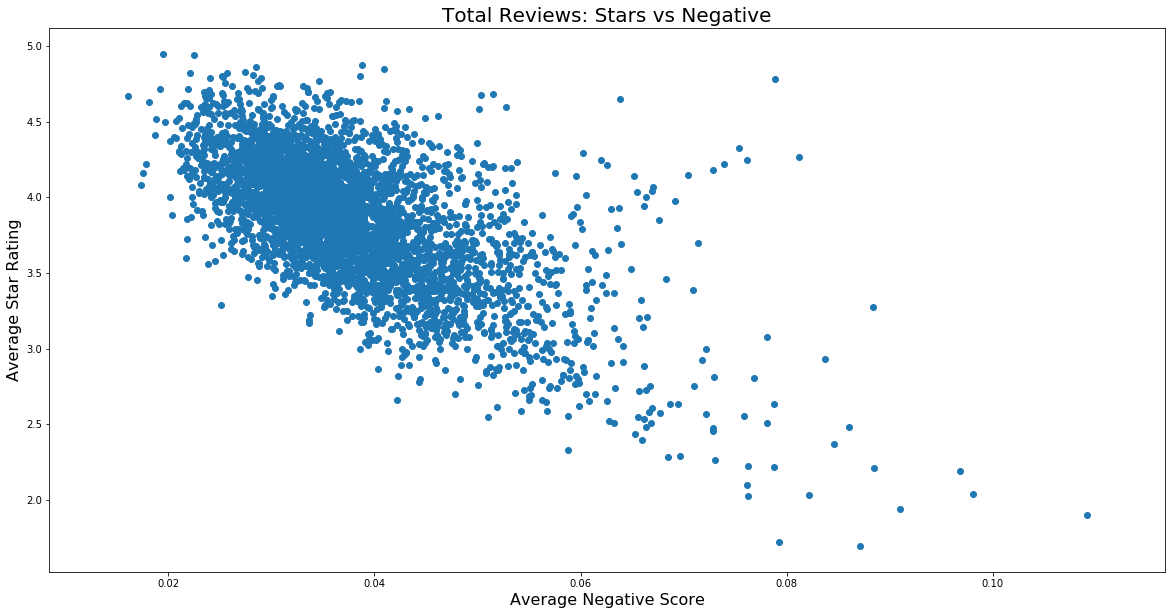

In [183]:
plt.figure(figsize=(20,10))
plt.scatter(avg_total_reviews['Negative'], avg_total_reviews['stars'])
plt.title('Total Reviews: Stars vs Negative', fontsize = 20)
plt.xlabel('Average Negative Score', fontsize = 16)
plt.ylabel('Average Star Rating', fontsize = 16)
plt.savefig('avgtotalneg.png')
plt.show()

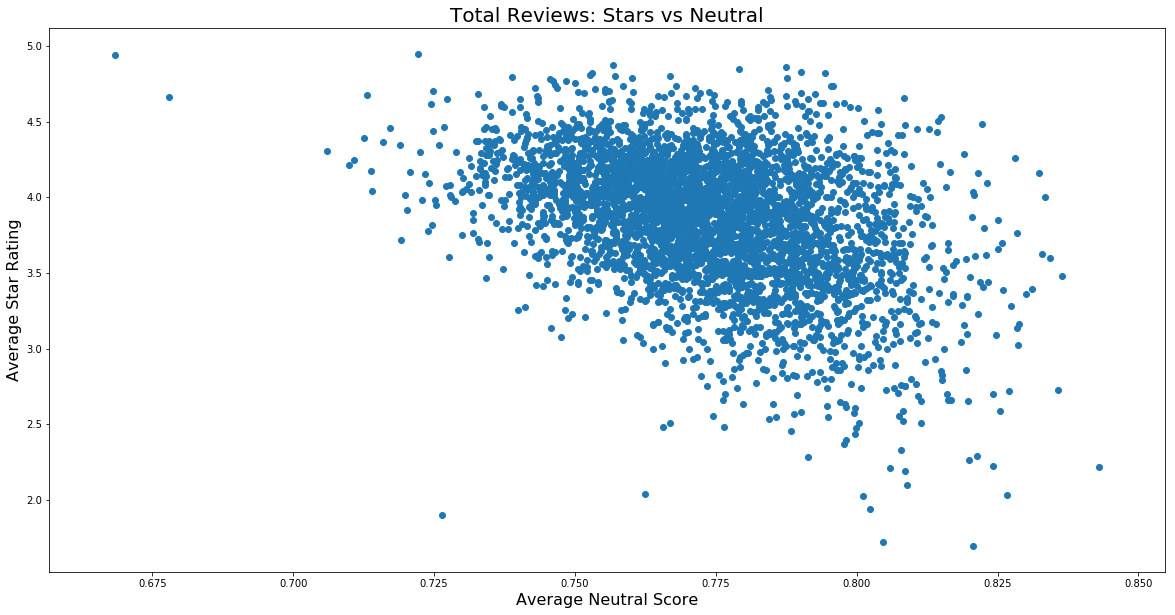

In [184]:
plt.figure(figsize=(20,10))
plt.scatter(avg_total_reviews['Neutral'], avg_total_reviews['stars'])
plt.title('Total Reviews: Stars vs Neutral', fontsize = 20)
plt.xlabel('Average Neutral Score', fontsize = 16)
plt.ylabel('Average Star Rating', fontsize = 16)
plt.savefig('avgtotalneu.png')
plt.show()

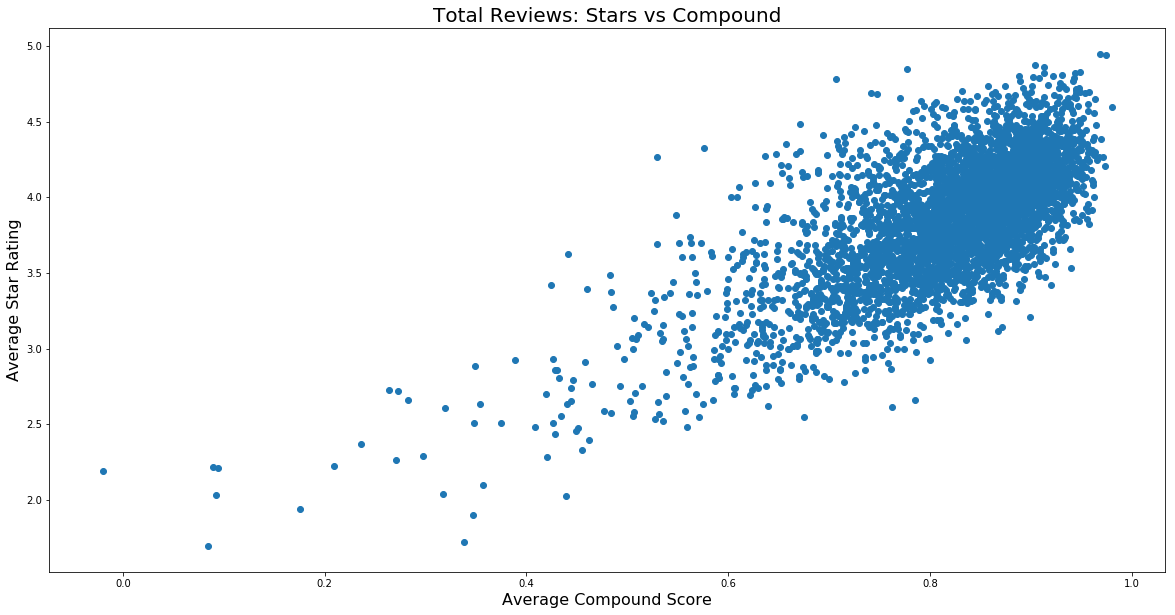

In [185]:
plt.figure(figsize=(20,10))
plt.scatter(avg_total_reviews['Compound'], avg_total_reviews['stars'])
plt.title('Total Reviews: Stars vs Compound', fontsize = 20)
plt.xlabel('Average Compound Score', fontsize = 16)
plt.ylabel('Average Star Rating', fontsize = 16)
plt.savefig('avgtotalcomp.png')
plt.show()

In [186]:
x_pos = avg_total_reviews.iloc[:,1].values
x_neg = avg_total_reviews.iloc[:,2].values
x_neu = avg_total_reviews.iloc[:,3].values
x_comp = avg_total_reviews.iloc[:,4].values
y = avg_total_reviews.iloc[:,0].values

In [187]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_neu.reshape(-1,1),x_comp.reshape(-1,1)), axis = 1)


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [189]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.254e+05
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:49:43   Log-Likelihood:                -575.14
No. Observations:                2921   AIC:                             1158.
Df Residuals:                    2917   BIC:                             1182.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.3548      0.354     15.128      0.0

In [190]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.078
Variance Score: 0.546


In [191]:
max(y_pred)

4.467084758598434

Remove compound from model

In [192]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_neu.reshape(-1,1)), axis = 1)


In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [194]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.551e+05
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:50:19   Log-Likelihood:                -684.71
No. Observations:                2921   AIC:                             1375.
Df Residuals:                    2918   BIC:                             1393.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.4817      0.233     40.711      0.0

In [195]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.082
Variance Score: 0.524


Remove neutral from model

In [196]:
X = np.concatenate((x_pos.reshape(-1,1),x_neg.reshape(-1,1),x_comp.reshape(-1,1)), axis = 1)


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [198]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.422e+05
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:51:34   Log-Likelihood:                -811.16
No. Observations:                2921   AIC:                             1628.
Df Residuals:                    2918   BIC:                             1646.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.4122      0.381     11.580      0.0

In [199]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.098
Variance Score: 0.431


Remove neg and neu from model

In [200]:
X = np.concatenate((x_pos.reshape(-1,1),x_comp.reshape(-1,1)), axis = 1)


In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [202]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.901e+05
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:52:01   Log-Likelihood:                -978.23
No. Observations:                2921   AIC:                             1960.
Df Residuals:                    2919   BIC:                             1972.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.7940      0.380     17.858      0.0

In [203]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.101
Variance Score: 0.413


Compound only

In [204]:
X = x_comp.reshape(-1,1)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [206]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.426e+05
Date:                Sat, 28 Jul 2018   Prob (F-statistic):               0.00
Time:                        04:53:11   Log-Likelihood:                -1129.7
No. Observations:                2921   AIC:                             2261.
Df Residuals:                    2920   BIC:                             2267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.7056      0.008    585.357      0.0

In [207]:
y_pred = est2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
variance_score = r2_score(y_test, y_pred)
print(f"MSE: {'{:.3f}'.format(mse)}\nVariance Score: {'{:.3f}'.format(variance_score)}")

MSE: 0.113
Variance Score: 0.344
